# Dependências

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Configurações

In [2]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 15

# Utils

In [3]:
voc = ["EU", "VOCÊ", "É", "SOU", "MUITO", "LEGAL", "DEMAIS", "INCRÍVEL"]

def encode(text):
  a_text = text.split(" ")
  r = []
  for i in a_text:
    if i in voc:
      r.append(voc.index(i))
  return np.array(r)


def decode(a_text):
  return voc[np.argmax(a_text)]

# Dataset

In [4]:
sentences = ["EU SOU MUITO LEGAL",
             "MUITO LEGAL EU SOU",
             "EU SOU LEGAL DEMAIS",
             "VOCÊ É MUITO LEGAL",
             "VOCÊ É LEGAL DEMAIS"]

encoded_sentences = [encode(sentence) for sentence in sentences]
# print(encoded_sentences)

data = np.array(encoded_sentences)

targets = data[:,-1]
inputs = data[:,0:3]

print(f"Inputs: \n{inputs}")
print(f"Targets: \n{targets}")

Inputs: 
[[0 3 4]
 [4 5 0]
 [0 3 5]
 [1 2 4]
 [1 2 5]]
Targets: 
[5 3 6 5 6]


# Arquitetura

In [5]:
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3, 1), activation='tanh'))
model.add(Dense(8, activation='softmax'))

# Compile o modelo
learning_rate = 0.1
#adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy')

# Imprime a arquitetura
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │            88 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208 (832.00 B)

 Trainable params: 208 (832.00 B)

 Non-trainable params: 0 (0.00 B)

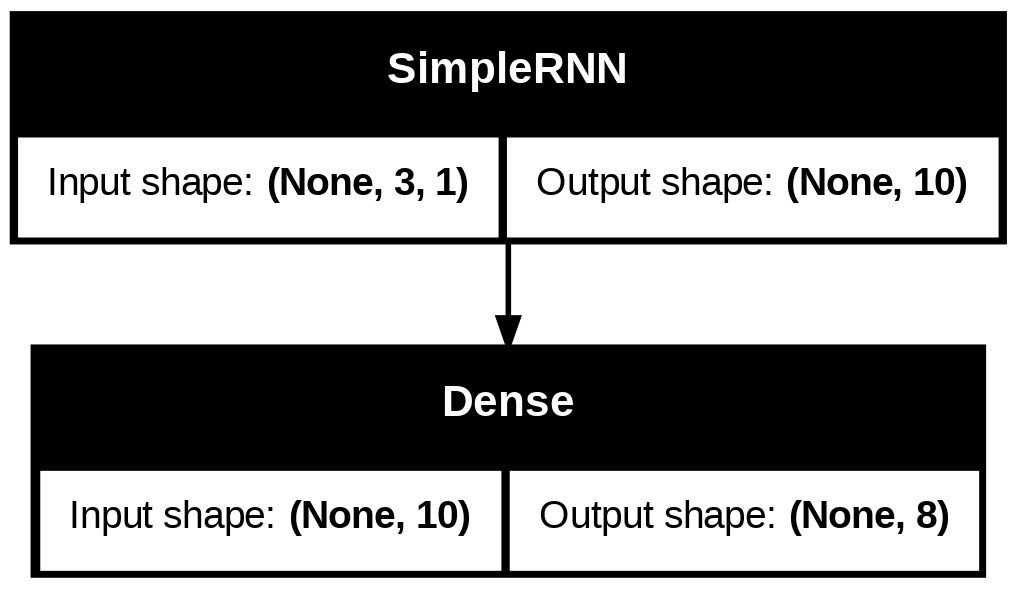

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Treinamento

In [7]:
# Hiperparâmetros
epochs = 500

# Treine o modelo
log = model.fit(inputs, targets, epochs=epochs)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step - loss: 1.9011
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.5503
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.3824
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.2657
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.1774
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 1.1073
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.0493
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.0001
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.9574
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.9199
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.8867
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.8571
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.8306
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.8068
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.7853
Epoch 16/500
1/1 ━

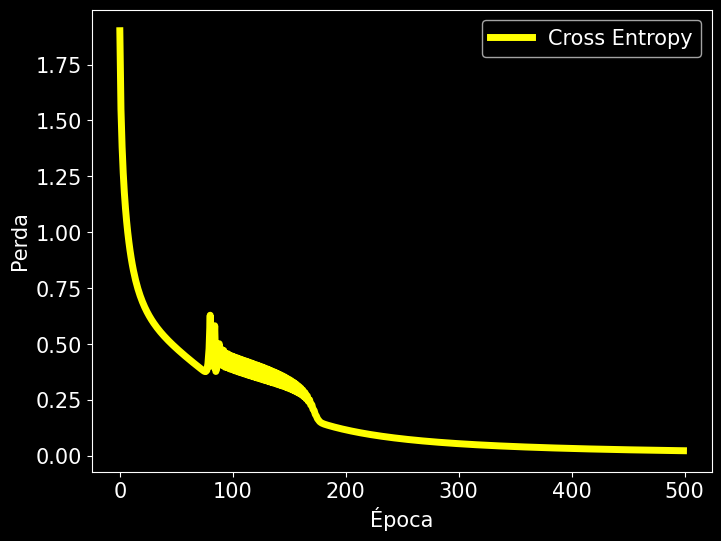

In [8]:
losses = log.history["loss"]
data_epochs = np.arange(0, epochs, 1)

plt.plot(data_epochs, losses, color="yellow", lw=5, label = 'Cross Entropy')

plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

# Teste

In [22]:
# Testa a previsão com uma nova sequência
#test_sequence = [1, 0, 1]

text = "EU SOU MUITO" #Valor conhecido
text = "VOCÊ É INCRÍVEL" #valor desconhecido
text = "SOU MUITO INCRÍVEL" #valor desconhecido meio provável
text = "VOCÊ É EU" #valor desconhecido improvável
text = "EU SOU É" #valor desconhecido improvável

test_sequence = encode(text)
predicted_output = model.predict(np.array([test_sequence]))

print(f"Vocabulário: {voc}")
print()
print(f"Frases conhecidas:\n")

for i in range(len(inputs)):
    s = ""
    for j in inputs[i]:
      s += voc[j] +" "
    print(f"{s}{voc[targets[i]]}")

print()

print(f"Sequência de entrada: {test_sequence}")
print(f"Sequência prevista: {predicted_output}")
print()

print(f"Texto de entrada: {text} ...")
print(f"Texto de saída: {text} {decode(predicted_output)}. ({np.max(predicted_output)})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Vocabulário: ['EU', 'VOCÊ', 'É', 'SOU', 'MUITO', 'LEGAL', 'DEMAIS', 'INCRÍVEL']

Frases conhecidas:

EU SOU MUITO LEGAL
MUITO LEGAL EU SOU
EU SOU LEGAL DEMAIS
VOCÊ É MUITO LEGAL
VOCÊ É LEGAL DEMAIS

Sequência de entrada: [0 3 2]
Sequência prevista: [[1.6027811e-04 2.0790345e-04 1.7552548e-04 9.1588516e-03 2.8396604e-04
  9.8833233e-01 1.2551720e-03 4.2591477e-04]]

Texto de entrada: EU SOU É ...
Texto de saída: EU SOU É LEGAL. (0.9883323311805725)
